In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler


data = pd.read_csv('Dataset_ student work.csv')
data.head()

,Age ( years),Gender (Male = 1),BMI,Diastolic Blood pressure,cholesterol level,smoke (yes =1),alchohol (yes = 1),active (yes=1),Fasting Blood sugar,cardio(yes=1)
0,30,1,0.0030,85,1,0,0,1,120,0
1,30,1,0.0023,85,1,0,0,1,132,0
2,30,1,0.0019,85,1,0,0,1,115,0
3,30,1,0.0023,65,1,0,0,1,67,0
4,39,1,0.0039,115,3,0,0,1,127,1


In [2]:
data.columns

Index(['Age ( years) ', 'Gender (Male = 1)', 'BMI', 'Diastolic Blood pressure',
       'cholesterol level', 'smoke (yes =1)', 'alchohol (yes = 1)',
       'active (yes=1)', 'Fasting Blood sugar', 'cardio(yes=1)'],
      dtype='object')

In [3]:
temp = np.random.randint(2, size=(100,1))
data.insert(1,"obesity (yes=1)",temp)

In [4]:
data

,Age ( years),obesity (yes=1),Gender (Male = 1),BMI,Diastolic Blood pressure,cholesterol level,smoke (yes =1),alchohol (yes = 1),active (yes=1),Fasting Blood sugar,cardio(yes=1)
0,30,0,1,0.0030,85,1,0,0,1,120,0
1,30,1,1,0.0023,85,1,0,0,1,132,0
2,30,1,1,0.0019,85,1,0,0,1,115,0
3,30,1,1,0.0023,65,1,0,0,1,67,0
4,39,0,1,0.0039,115,3,0,0,1,127,1
...,...,...,...,...,...,...,...,...,...,...,...
95,39,1,1,0.0026,95,1,0,0,1,137,0
96,39,0,2,0.0022,85,1,0,0,1,134,0
97,39,0,1,0.0021,95,1,0,0,1,76,0
98,39,1,2,0.0024,85,2,0,0,1,68,0


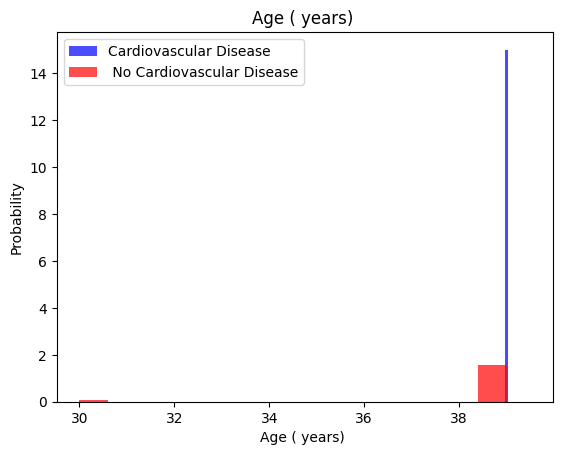

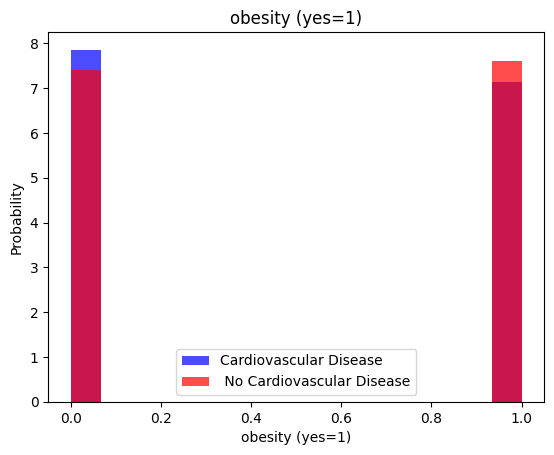

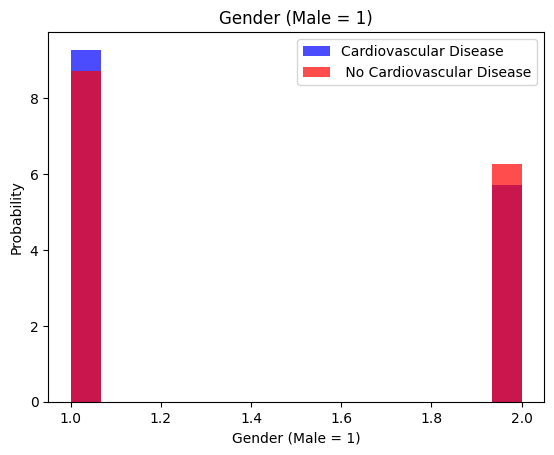

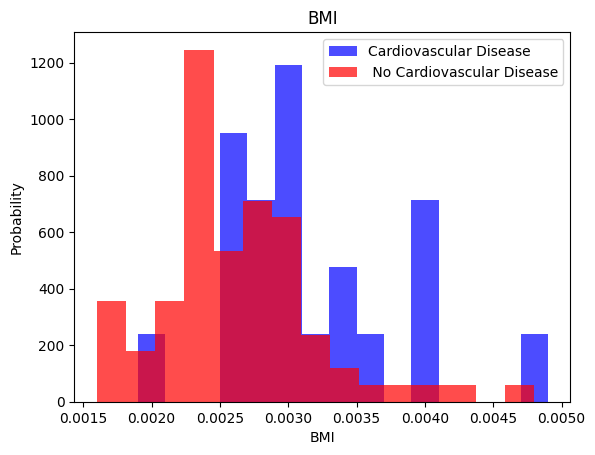

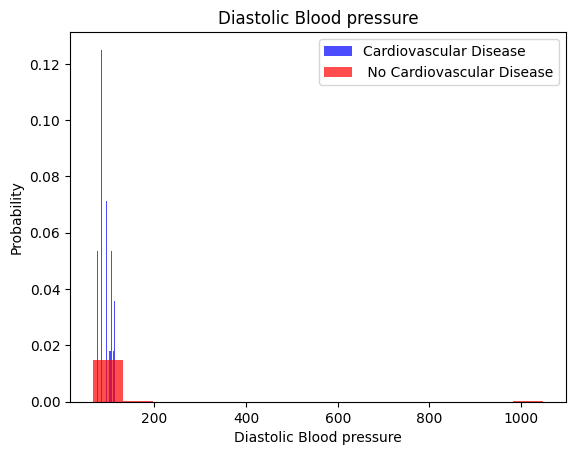

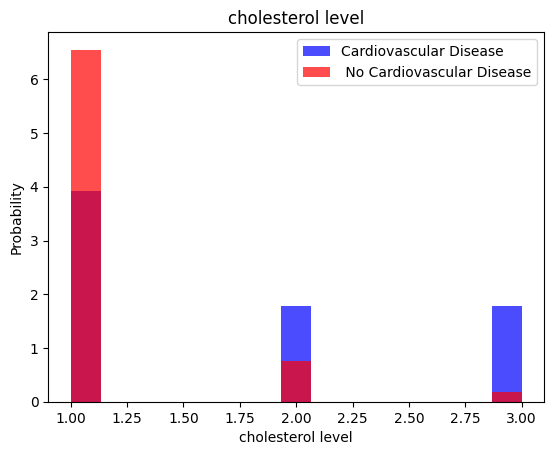

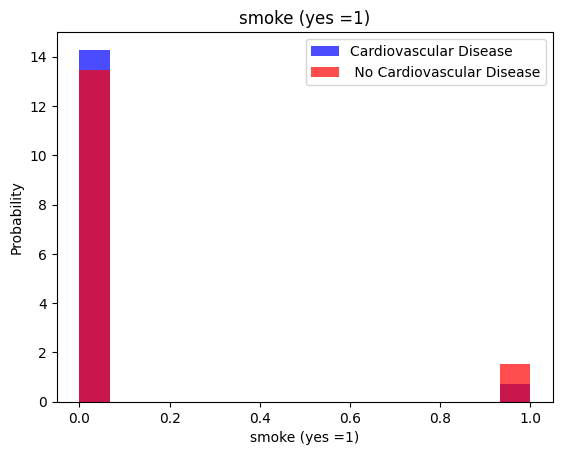

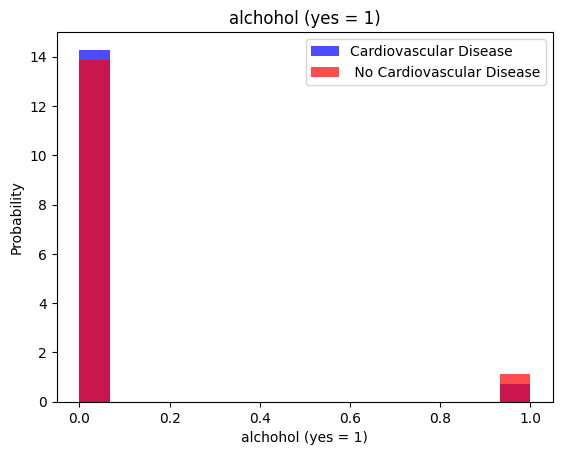

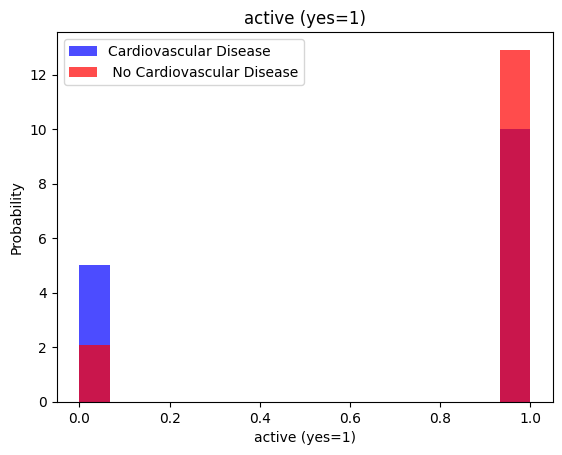

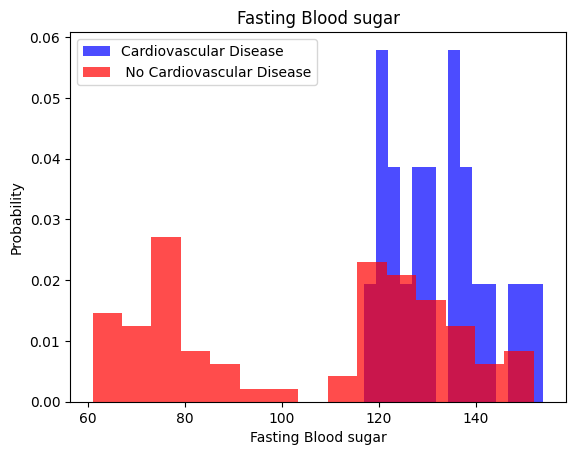

In [5]:
for i in range(len(data.columns[:-1])):
    label =data.columns[i]
    plt.hist(data[data['cardio(yes=1)'] == 1][label],color='blue',label="Cardiovascular Disease",alpha =0.7,density=True,bins=15)
    plt.hist(data[data['cardio(yes=1)'] == 0][label],color='red',label=" No Cardiovascular Disease",alpha =0.7,density=True,bins=15)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [6]:
X = data[data.columns[:-1]].values
Y = data[data.columns[-1]].values

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
df = np.hstack((X,np.reshape(Y,(-1,1))))
transformed_df = pd.DataFrame(df,columns = data.columns)

In [14]:
over = RandomOverSampler()
X,Y = over.fit_resample(X,Y)

In [15]:
len(transformed_df[transformed_df["cardio(yes=1)"]==1]), len(transformed_df[transformed_df["cardio(yes=1)"]==0])

(79, 79)

In [16]:
X_train , X_temp, y_train, y_temp = train_test_split(X,Y,test_size=0.4,random_state=0)
X_valid , X_test, y_valid, y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=0)

In [17]:
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)



model = tf.keras.Sequential([tf.keras.layers.Dense(16,activation ='relu'),
tf.keras.layers.Dense(16,activation ='relu'),
    tf.keras.layers.Dense(1,activation ="sigmoid")
    ])

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])


In [19]:
model.evaluate(X_train,y_train)

3/3 [==============================] - 0s 3ms/step - loss: 0.7240 - accuracy: 0.4681


[0.7240163683891296, 0.4680851101875305]

In [20]:
model.evaluate(X_valid,y_valid)

1/1 [==============================] - 0s 19ms/step - loss: 0.7307 - accuracy: 0.5625


[0.7306734323501587, 0.5625]

In [21]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='MNIST_pred', monitor='val_loss', save_best_only=True)]


history = model.fit(X_train,y_train,batch_size=100,epochs=100,validation_data=(X_valid,y_valid),callbacks=callbacks)


Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.7240 - accuracy: 0.4681

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 1s 1s/step - loss: 0.7240 - accuracy: 0.4681 - val_loss: 0.7254 - val_accuracy: 0.5625
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.7168 - accuracy: 0.4681

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 394ms/step - loss: 0.7168 - accuracy: 0.4681 - val_loss: 0.7203 - val_accuracy: 0.5625
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.7097 - accuracy: 0.4681

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 381ms/step - loss: 0.7097 - accuracy: 0.4681 - val_loss: 0.7153 - val_accuracy: 0.5625
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.7028 - accuracy: 0.4681

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 384ms/step - loss: 0.7028 - accuracy: 0.4681 - val_loss: 0.7105 - val_accuracy: 0.5625
Epoch 5/100
1/1 [==============================] - ETA: 0s - loss: 0.6961 - accuracy: 0.4681

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 1s 529ms/step - loss: 0.6961 - accuracy: 0.4681 - val_loss: 0.7060 - val_accuracy: 0.5625
Epoch 6/100
1/1 [==============================] - ETA: 0s - loss: 0.6895 - accuracy: 0.4681

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 403ms/step - loss: 0.6895 - accuracy: 0.4681 - val_loss: 0.7015 - val_accuracy: 0.5625
Epoch 7/100
1/1 [==============================] - ETA: 0s - loss: 0.6832 - accuracy: 0.4681

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 367ms/step - loss: 0.6832 - accuracy: 0.4681 - val_loss: 0.6974 - val_accuracy: 0.5625
Epoch 8/100
1/1 [==============================] - ETA: 0s - loss: 0.6770 - accuracy: 0.5000

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 366ms/step - loss: 0.6770 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5625
Epoch 9/100
1/1 [==============================] - ETA: 0s - loss: 0.6712 - accuracy: 0.5000

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 366ms/step - loss: 0.6712 - accuracy: 0.5000 - val_loss: 0.6896 - val_accuracy: 0.5625
Epoch 10/100
1/1 [==============================] - ETA: 0s - loss: 0.6654 - accuracy: 0.5000

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 379ms/step - loss: 0.6654 - accuracy: 0.5000 - val_loss: 0.6860 - val_accuracy: 0.5625
Epoch 11/100
1/1 [==============================] - ETA: 0s - loss: 0.6598 - accuracy: 0.5000

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 397ms/step - loss: 0.6598 - accuracy: 0.5000 - val_loss: 0.6824 - val_accuracy: 0.5625
Epoch 12/100
1/1 [==============================] - ETA: 0s - loss: 0.6544 - accuracy: 0.5000

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 408ms/step - loss: 0.6544 - accuracy: 0.5000 - val_loss: 0.6789 - val_accuracy: 0.6250
Epoch 13/100
1/1 [==============================] - ETA: 0s - loss: 0.6491 - accuracy: 0.5319

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 381ms/step - loss: 0.6491 - accuracy: 0.5319 - val_loss: 0.6755 - val_accuracy: 0.5938
Epoch 14/100
1/1 [==============================] - ETA: 0s - loss: 0.6438 - accuracy: 0.5319

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 1s 546ms/step - loss: 0.6438 - accuracy: 0.5319 - val_loss: 0.6721 - val_accuracy: 0.5938
Epoch 15/100
1/1 [==============================] - ETA: 0s - loss: 0.6387 - accuracy: 0.5319

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 409ms/step - loss: 0.6387 - accuracy: 0.5319 - val_loss: 0.6688 - val_accuracy: 0.5938
Epoch 16/100
1/1 [==============================] - ETA: 0s - loss: 0.6338 - accuracy: 0.5638

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 392ms/step - loss: 0.6338 - accuracy: 0.5638 - val_loss: 0.6658 - val_accuracy: 0.5938
Epoch 17/100
1/1 [==============================] - ETA: 0s - loss: 0.6290 - accuracy: 0.5638

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 384ms/step - loss: 0.6290 - accuracy: 0.5638 - val_loss: 0.6628 - val_accuracy: 0.5938
Epoch 18/100
1/1 [==============================] - ETA: 0s - loss: 0.6244 - accuracy: 0.5745

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 375ms/step - loss: 0.6244 - accuracy: 0.5745 - val_loss: 0.6599 - val_accuracy: 0.5938
Epoch 19/100
1/1 [==============================] - ETA: 0s - loss: 0.6199 - accuracy: 0.5745

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 388ms/step - loss: 0.6199 - accuracy: 0.5745 - val_loss: 0.6571 - val_accuracy: 0.6250
Epoch 20/100
1/1 [==============================] - ETA: 0s - loss: 0.6154 - accuracy: 0.5957

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 395ms/step - loss: 0.6154 - accuracy: 0.5957 - val_loss: 0.6544 - val_accuracy: 0.6562
Epoch 21/100
1/1 [==============================] - ETA: 0s - loss: 0.6109 - accuracy: 0.6170

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 388ms/step - loss: 0.6109 - accuracy: 0.6170 - val_loss: 0.6517 - val_accuracy: 0.6562
Epoch 22/100
1/1 [==============================] - ETA: 0s - loss: 0.6067 - accuracy: 0.6170

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 397ms/step - loss: 0.6067 - accuracy: 0.6170 - val_loss: 0.6491 - val_accuracy: 0.6562
Epoch 23/100
1/1 [==============================] - ETA: 0s - loss: 0.6026 - accuracy: 0.6170

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 366ms/step - loss: 0.6026 - accuracy: 0.6170 - val_loss: 0.6467 - val_accuracy: 0.6875
Epoch 24/100
1/1 [==============================] - ETA: 0s - loss: 0.5986 - accuracy: 0.6489

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 1s 518ms/step - loss: 0.5986 - accuracy: 0.6489 - val_loss: 0.6444 - val_accuracy: 0.6875
Epoch 25/100
1/1 [==============================] - ETA: 0s - loss: 0.5947 - accuracy: 0.6596

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 376ms/step - loss: 0.5947 - accuracy: 0.6596 - val_loss: 0.6423 - val_accuracy: 0.6562
Epoch 26/100
1/1 [==============================] - ETA: 0s - loss: 0.5910 - accuracy: 0.6915

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 378ms/step - loss: 0.5910 - accuracy: 0.6915 - val_loss: 0.6402 - val_accuracy: 0.6562
Epoch 27/100
1/1 [==============================] - ETA: 0s - loss: 0.5873 - accuracy: 0.7553

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 364ms/step - loss: 0.5873 - accuracy: 0.7553 - val_loss: 0.6380 - val_accuracy: 0.6875
Epoch 28/100
1/1 [==============================] - ETA: 0s - loss: 0.5836 - accuracy: 0.7660

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 362ms/step - loss: 0.5836 - accuracy: 0.7660 - val_loss: 0.6358 - val_accuracy: 0.6875
Epoch 29/100
1/1 [==============================] - ETA: 0s - loss: 0.5800 - accuracy: 0.7660

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 392ms/step - loss: 0.5800 - accuracy: 0.7660 - val_loss: 0.6337 - val_accuracy: 0.6875
Epoch 30/100
1/1 [==============================] - ETA: 0s - loss: 0.5764 - accuracy: 0.7660

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 396ms/step - loss: 0.5764 - accuracy: 0.7660 - val_loss: 0.6316 - val_accuracy: 0.6562
Epoch 31/100
1/1 [==============================] - ETA: 0s - loss: 0.5729 - accuracy: 0.7660

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 386ms/step - loss: 0.5729 - accuracy: 0.7660 - val_loss: 0.6296 - val_accuracy: 0.6875
Epoch 32/100
1/1 [==============================] - ETA: 0s - loss: 0.5694 - accuracy: 0.7660

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 408ms/step - loss: 0.5694 - accuracy: 0.7660 - val_loss: 0.6276 - val_accuracy: 0.6875
Epoch 33/100
1/1 [==============================] - ETA: 0s - loss: 0.5660 - accuracy: 0.7660

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 1s 517ms/step - loss: 0.5660 - accuracy: 0.7660 - val_loss: 0.6257 - val_accuracy: 0.6875
Epoch 34/100
1/1 [==============================] - ETA: 0s - loss: 0.5626 - accuracy: 0.7660

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 376ms/step - loss: 0.5626 - accuracy: 0.7660 - val_loss: 0.6237 - val_accuracy: 0.6875
Epoch 35/100
1/1 [==============================] - ETA: 0s - loss: 0.5593 - accuracy: 0.7660

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 378ms/step - loss: 0.5593 - accuracy: 0.7660 - val_loss: 0.6218 - val_accuracy: 0.6875
Epoch 36/100
1/1 [==============================] - ETA: 0s - loss: 0.5559 - accuracy: 0.7660

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 361ms/step - loss: 0.5559 - accuracy: 0.7660 - val_loss: 0.6199 - val_accuracy: 0.6875
Epoch 37/100
1/1 [==============================] - ETA: 0s - loss: 0.5525 - accuracy: 0.7660

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 397ms/step - loss: 0.5525 - accuracy: 0.7660 - val_loss: 0.6180 - val_accuracy: 0.6875
Epoch 38/100
1/1 [==============================] - ETA: 0s - loss: 0.5492 - accuracy: 0.7660

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 403ms/step - loss: 0.5492 - accuracy: 0.7660 - val_loss: 0.6161 - val_accuracy: 0.6875
Epoch 39/100
1/1 [==============================] - ETA: 0s - loss: 0.5458 - accuracy: 0.7660

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 394ms/step - loss: 0.5458 - accuracy: 0.7660 - val_loss: 0.6140 - val_accuracy: 0.6875
Epoch 40/100
1/1 [==============================] - ETA: 0s - loss: 0.5425 - accuracy: 0.7660

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 375ms/step - loss: 0.5425 - accuracy: 0.7660 - val_loss: 0.6120 - val_accuracy: 0.6875
Epoch 41/100
1/1 [==============================] - ETA: 0s - loss: 0.5392 - accuracy: 0.7660

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 374ms/step - loss: 0.5392 - accuracy: 0.7660 - val_loss: 0.6100 - val_accuracy: 0.6875
Epoch 42/100
1/1 [==============================] - ETA: 0s - loss: 0.5360 - accuracy: 0.7553

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 376ms/step - loss: 0.5360 - accuracy: 0.7553 - val_loss: 0.6079 - val_accuracy: 0.6875
Epoch 43/100
1/1 [==============================] - ETA: 0s - loss: 0.5328 - accuracy: 0.7553

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 1s 528ms/step - loss: 0.5328 - accuracy: 0.7553 - val_loss: 0.6059 - val_accuracy: 0.6875
Epoch 44/100
1/1 [==============================] - ETA: 0s - loss: 0.5297 - accuracy: 0.7553

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 353ms/step - loss: 0.5297 - accuracy: 0.7553 - val_loss: 0.6039 - val_accuracy: 0.7188
Epoch 45/100
1/1 [==============================] - ETA: 0s - loss: 0.5265 - accuracy: 0.7660

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 361ms/step - loss: 0.5265 - accuracy: 0.7660 - val_loss: 0.6019 - val_accuracy: 0.7188
Epoch 46/100
1/1 [==============================] - ETA: 0s - loss: 0.5234 - accuracy: 0.7660

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 386ms/step - loss: 0.5234 - accuracy: 0.7660 - val_loss: 0.5999 - val_accuracy: 0.7188
Epoch 47/100
1/1 [==============================] - ETA: 0s - loss: 0.5202 - accuracy: 0.7766

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 404ms/step - loss: 0.5202 - accuracy: 0.7766 - val_loss: 0.5978 - val_accuracy: 0.7500
Epoch 48/100
1/1 [==============================] - ETA: 0s - loss: 0.5171 - accuracy: 0.7766

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 394ms/step - loss: 0.5171 - accuracy: 0.7766 - val_loss: 0.5958 - val_accuracy: 0.7500
Epoch 49/100
1/1 [==============================] - ETA: 0s - loss: 0.5140 - accuracy: 0.7872

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 362ms/step - loss: 0.5140 - accuracy: 0.7872 - val_loss: 0.5937 - val_accuracy: 0.7500
Epoch 50/100
1/1 [==============================] - ETA: 0s - loss: 0.5109 - accuracy: 0.7872

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 386ms/step - loss: 0.5109 - accuracy: 0.7872 - val_loss: 0.5915 - val_accuracy: 0.7812
Epoch 51/100
1/1 [==============================] - ETA: 0s - loss: 0.5077 - accuracy: 0.7872

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 382ms/step - loss: 0.5077 - accuracy: 0.7872 - val_loss: 0.5895 - val_accuracy: 0.7812
Epoch 52/100
1/1 [==============================] - ETA: 0s - loss: 0.5047 - accuracy: 0.7872

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 368ms/step - loss: 0.5047 - accuracy: 0.7872 - val_loss: 0.5876 - val_accuracy: 0.7812
Epoch 53/100
1/1 [==============================] - ETA: 0s - loss: 0.5017 - accuracy: 0.7872

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 1s 517ms/step - loss: 0.5017 - accuracy: 0.7872 - val_loss: 0.5855 - val_accuracy: 0.7812
Epoch 54/100
1/1 [==============================] - ETA: 0s - loss: 0.4987 - accuracy: 0.7872

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 382ms/step - loss: 0.4987 - accuracy: 0.7872 - val_loss: 0.5835 - val_accuracy: 0.8125
Epoch 55/100
1/1 [==============================] - ETA: 0s - loss: 0.4957 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 397ms/step - loss: 0.4957 - accuracy: 0.8404 - val_loss: 0.5815 - val_accuracy: 0.8125
Epoch 56/100
1/1 [==============================] - ETA: 0s - loss: 0.4928 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 385ms/step - loss: 0.4928 - accuracy: 0.8404 - val_loss: 0.5795 - val_accuracy: 0.8125
Epoch 57/100
1/1 [==============================] - ETA: 0s - loss: 0.4898 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 405ms/step - loss: 0.4898 - accuracy: 0.8404 - val_loss: 0.5775 - val_accuracy: 0.8125
Epoch 58/100
1/1 [==============================] - ETA: 0s - loss: 0.4869 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 399ms/step - loss: 0.4869 - accuracy: 0.8404 - val_loss: 0.5755 - val_accuracy: 0.8125
Epoch 59/100
1/1 [==============================] - ETA: 0s - loss: 0.4841 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 380ms/step - loss: 0.4841 - accuracy: 0.8404 - val_loss: 0.5735 - val_accuracy: 0.8125
Epoch 60/100
1/1 [==============================] - ETA: 0s - loss: 0.4812 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 350ms/step - loss: 0.4812 - accuracy: 0.8404 - val_loss: 0.5715 - val_accuracy: 0.8125
Epoch 61/100
1/1 [==============================] - ETA: 0s - loss: 0.4784 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 369ms/step - loss: 0.4784 - accuracy: 0.8404 - val_loss: 0.5696 - val_accuracy: 0.8125
Epoch 62/100
1/1 [==============================] - ETA: 0s - loss: 0.4757 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 378ms/step - loss: 0.4757 - accuracy: 0.8404 - val_loss: 0.5677 - val_accuracy: 0.8125
Epoch 63/100
1/1 [==============================] - ETA: 0s - loss: 0.4730 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 1s 560ms/step - loss: 0.4730 - accuracy: 0.8404 - val_loss: 0.5658 - val_accuracy: 0.8125
Epoch 64/100
1/1 [==============================] - ETA: 0s - loss: 0.4703 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 412ms/step - loss: 0.4703 - accuracy: 0.8404 - val_loss: 0.5640 - val_accuracy: 0.8125
Epoch 65/100
1/1 [==============================] - ETA: 0s - loss: 0.4676 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 369ms/step - loss: 0.4676 - accuracy: 0.8404 - val_loss: 0.5622 - val_accuracy: 0.8125
Epoch 66/100
1/1 [==============================] - ETA: 0s - loss: 0.4649 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 373ms/step - loss: 0.4649 - accuracy: 0.8404 - val_loss: 0.5605 - val_accuracy: 0.7812
Epoch 67/100
1/1 [==============================] - ETA: 0s - loss: 0.4622 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 397ms/step - loss: 0.4622 - accuracy: 0.8404 - val_loss: 0.5588 - val_accuracy: 0.7812
Epoch 68/100
1/1 [==============================] - ETA: 0s - loss: 0.4596 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 391ms/step - loss: 0.4596 - accuracy: 0.8404 - val_loss: 0.5572 - val_accuracy: 0.8125
Epoch 69/100
1/1 [==============================] - ETA: 0s - loss: 0.4569 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 387ms/step - loss: 0.4569 - accuracy: 0.8404 - val_loss: 0.5556 - val_accuracy: 0.8125
Epoch 70/100
1/1 [==============================] - ETA: 0s - loss: 0.4542 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 407ms/step - loss: 0.4542 - accuracy: 0.8404 - val_loss: 0.5541 - val_accuracy: 0.8125
Epoch 71/100
1/1 [==============================] - ETA: 0s - loss: 0.4516 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 357ms/step - loss: 0.4516 - accuracy: 0.8404 - val_loss: 0.5526 - val_accuracy: 0.8125
Epoch 72/100
1/1 [==============================] - ETA: 0s - loss: 0.4490 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 360ms/step - loss: 0.4490 - accuracy: 0.8404 - val_loss: 0.5511 - val_accuracy: 0.8125
Epoch 73/100
1/1 [==============================] - ETA: 0s - loss: 0.4464 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 1s 524ms/step - loss: 0.4464 - accuracy: 0.8404 - val_loss: 0.5497 - val_accuracy: 0.7812
Epoch 74/100
1/1 [==============================] - ETA: 0s - loss: 0.4438 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 410ms/step - loss: 0.4438 - accuracy: 0.8404 - val_loss: 0.5482 - val_accuracy: 0.7812
Epoch 75/100
1/1 [==============================] - ETA: 0s - loss: 0.4413 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 402ms/step - loss: 0.4413 - accuracy: 0.8404 - val_loss: 0.5467 - val_accuracy: 0.7812
Epoch 76/100
1/1 [==============================] - ETA: 0s - loss: 0.4388 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 414ms/step - loss: 0.4388 - accuracy: 0.8404 - val_loss: 0.5452 - val_accuracy: 0.7812
Epoch 77/100
1/1 [==============================] - ETA: 0s - loss: 0.4363 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 375ms/step - loss: 0.4363 - accuracy: 0.8404 - val_loss: 0.5436 - val_accuracy: 0.7812
Epoch 78/100
1/1 [==============================] - ETA: 0s - loss: 0.4338 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 385ms/step - loss: 0.4338 - accuracy: 0.8404 - val_loss: 0.5419 - val_accuracy: 0.7812
Epoch 79/100
1/1 [==============================] - ETA: 0s - loss: 0.4313 - accuracy: 0.8404

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 382ms/step - loss: 0.4313 - accuracy: 0.8404 - val_loss: 0.5403 - val_accuracy: 0.7812
Epoch 80/100
1/1 [==============================] - ETA: 0s - loss: 0.4289 - accuracy: 0.8511

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 382ms/step - loss: 0.4289 - accuracy: 0.8511 - val_loss: 0.5387 - val_accuracy: 0.7812
Epoch 81/100
1/1 [==============================] - ETA: 0s - loss: 0.4265 - accuracy: 0.8511

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 351ms/step - loss: 0.4265 - accuracy: 0.8511 - val_loss: 0.5371 - val_accuracy: 0.7812
Epoch 82/100
1/1 [==============================] - ETA: 0s - loss: 0.4241 - accuracy: 0.8511

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 412ms/step - loss: 0.4241 - accuracy: 0.8511 - val_loss: 0.5354 - val_accuracy: 0.7812
Epoch 83/100
1/1 [==============================] - ETA: 0s - loss: 0.4218 - accuracy: 0.8511

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 1s 545ms/step - loss: 0.4218 - accuracy: 0.8511 - val_loss: 0.5338 - val_accuracy: 0.7812
Epoch 84/100
1/1 [==============================] - ETA: 0s - loss: 0.4194 - accuracy: 0.8511

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 366ms/step - loss: 0.4194 - accuracy: 0.8511 - val_loss: 0.5322 - val_accuracy: 0.7812
Epoch 85/100
1/1 [==============================] - ETA: 0s - loss: 0.4171 - accuracy: 0.8511

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 372ms/step - loss: 0.4171 - accuracy: 0.8511 - val_loss: 0.5307 - val_accuracy: 0.7812
Epoch 86/100
1/1 [==============================] - ETA: 0s - loss: 0.4148 - accuracy: 0.8511

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 365ms/step - loss: 0.4148 - accuracy: 0.8511 - val_loss: 0.5293 - val_accuracy: 0.7812
Epoch 87/100
1/1 [==============================] - ETA: 0s - loss: 0.4125 - accuracy: 0.8511

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 388ms/step - loss: 0.4125 - accuracy: 0.8511 - val_loss: 0.5278 - val_accuracy: 0.7812
Epoch 88/100
1/1 [==============================] - ETA: 0s - loss: 0.4102 - accuracy: 0.8511

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 369ms/step - loss: 0.4102 - accuracy: 0.8511 - val_loss: 0.5262 - val_accuracy: 0.7812
Epoch 89/100
1/1 [==============================] - ETA: 0s - loss: 0.4079 - accuracy: 0.8511

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 361ms/step - loss: 0.4079 - accuracy: 0.8511 - val_loss: 0.5247 - val_accuracy: 0.7812
Epoch 90/100
1/1 [==============================] - ETA: 0s - loss: 0.4056 - accuracy: 0.8511

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 396ms/step - loss: 0.4056 - accuracy: 0.8511 - val_loss: 0.5231 - val_accuracy: 0.7812
Epoch 91/100
1/1 [==============================] - ETA: 0s - loss: 0.4033 - accuracy: 0.8511

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 408ms/step - loss: 0.4033 - accuracy: 0.8511 - val_loss: 0.5216 - val_accuracy: 0.7812
Epoch 92/100
1/1 [==============================] - ETA: 0s - loss: 0.4010 - accuracy: 0.8511

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 420ms/step - loss: 0.4010 - accuracy: 0.8511 - val_loss: 0.5200 - val_accuracy: 0.7812
Epoch 93/100
1/1 [==============================] - ETA: 0s - loss: 0.3987 - accuracy: 0.8511

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 1s 519ms/step - loss: 0.3987 - accuracy: 0.8511 - val_loss: 0.5185 - val_accuracy: 0.7812
Epoch 94/100
1/1 [==============================] - ETA: 0s - loss: 0.3965 - accuracy: 0.8511

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 368ms/step - loss: 0.3965 - accuracy: 0.8511 - val_loss: 0.5169 - val_accuracy: 0.7812
Epoch 95/100
1/1 [==============================] - ETA: 0s - loss: 0.3943 - accuracy: 0.8511

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 389ms/step - loss: 0.3943 - accuracy: 0.8511 - val_loss: 0.5154 - val_accuracy: 0.7812
Epoch 96/100
1/1 [==============================] - ETA: 0s - loss: 0.3921 - accuracy: 0.8511

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 376ms/step - loss: 0.3921 - accuracy: 0.8511 - val_loss: 0.5140 - val_accuracy: 0.7812
Epoch 97/100
1/1 [==============================] - ETA: 0s - loss: 0.3899 - accuracy: 0.8617

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 394ms/step - loss: 0.3899 - accuracy: 0.8617 - val_loss: 0.5125 - val_accuracy: 0.7812
Epoch 98/100
1/1 [==============================] - ETA: 0s - loss: 0.3878 - accuracy: 0.8617

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 363ms/step - loss: 0.3878 - accuracy: 0.8617 - val_loss: 0.5109 - val_accuracy: 0.7812
Epoch 99/100
1/1 [==============================] - ETA: 0s - loss: 0.3856 - accuracy: 0.8617

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 398ms/step - loss: 0.3856 - accuracy: 0.8617 - val_loss: 0.5093 - val_accuracy: 0.7812
Epoch 100/100
1/1 [==============================] - ETA: 0s - loss: 0.3835 - accuracy: 0.8617

INFO:tensorflow:Assets written to: MNIST_pred\assets


INFO:tensorflow:Assets written to: MNIST_pred\assets


1/1 [==============================] - 0s 385ms/step - loss: 0.3835 - accuracy: 0.8617 - val_loss: 0.5076 - val_accuracy: 0.7812


In [22]:
model.evaluate(X_train,y_train)

3/3 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.8617


[0.3814235329627991, 0.8617021441459656]

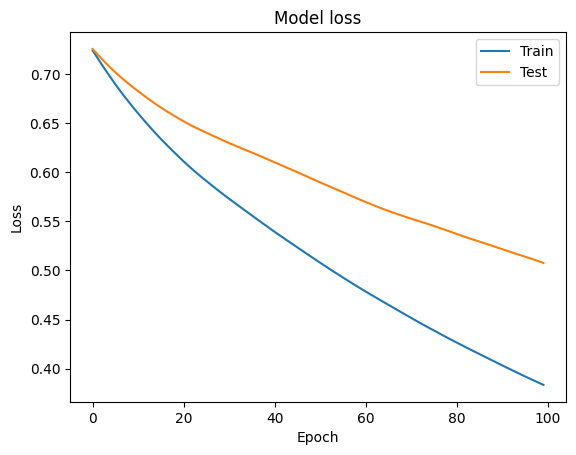

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

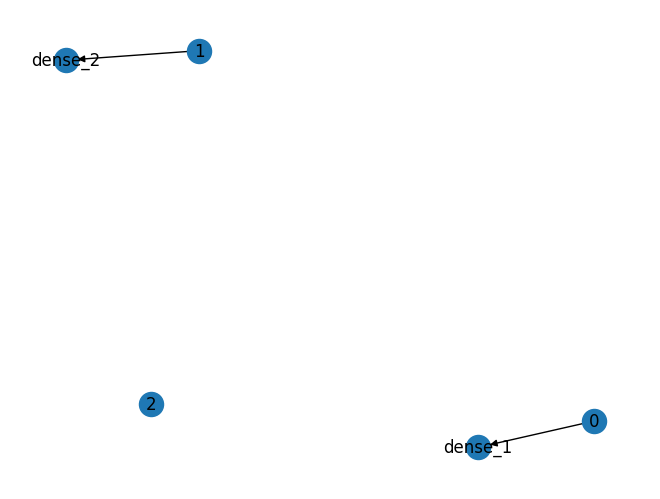

In [24]:
import networkx as nx
graph = nx.DiGraph()

# Adding nodes to the graph
for i, layer in enumerate(model.layers):
    graph.add_node(i, label=layer.name)

# Adding edges to the graph
for i, layer in enumerate(model.layers):
    for node in layer._outbound_nodes:
        graph.add_edge(i, node.outbound_layer.name)

# Plotting the graph
nx.draw(graph, with_labels=True)
plt.show()